In [2]:
from google.colab import drive
import pandas as pd
import os
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Set folder path
folder_path = '/content/drive/MyDrive/DSC_Project'

# Automatically find the CSV file containing 'instagram'
csv_files = [f for f in os.listdir(folder_path) if 'instagram' in f.lower() and f.endswith('.csv')]

if len(csv_files) == 0:
    print("No CSV file found with 'instagram' in its name.")
else:
    file_path = os.path.join(folder_path, csv_files[0])
    print(f"Loading file: {file_path}")
    df = pd.read_csv(file_path)
    print("File loaded successfully!")

# Clean column names (remove spaces, newlines)
df.columns = [c.strip().replace('\n','').replace(' ', '_') for c in df.columns]

# Convert followers & engagement columns to numeric
def convert_to_number(x):
    if isinstance(x, str):
        x = x.replace(",", "").strip()
        if 'M' in x:
            return float(x.replace('M','')) * 1_000_000
        elif 'K' in x:
            return float(x.replace('K','')) * 1_000
        else:
            try:
                return float(x)
            except:
                return np.nan
    return x

for col in ['Followers','Authentic_engagement','Engagement_avg']:
    df[col] = df[col].apply(convert_to_number)

# Drop rows without followers
df = df.dropna(subset=['Followers'])
df.head()


Mounted at /content/drive
Loading file: /content/drive/MyDrive/DSC_Project/social media influencers - instagram.csv
File loaded successfully!


,Influencer_insta_name,instagram_name,category_1,category_2,Followers,Audience_country(mostly),Authentic_engagement,Engagement_avg
0,433,433,Sports with a ball,NaN,48500000.0,Spain,383100.0,637000.0
1,__youngbae__,TAEYANG,Music,NaN,12700000.0,Indonesia,478000.0,542300.0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18800000.0,Russia,310800.0,377900.0
3,_imyour_joy,Joy,Lifestyle,NaN,13500000.0,Indonesia,1100000.0,1400000.0
4,_jeongjaehyun,Jaehyun,NaN,NaN,11100000.0,Indonesia,2500000.0,3100000.0


In [3]:
# Create score
df['Influencer_Score'] = (0.6*df['Authentic_engagement'] + 0.4*df['Engagement_avg']) / df['Followers']

# Top 5 influencers
top5 = df.sort_values(by='Influencer_Score', ascending=False).head(5)
top5[['Influencer_insta_name','Followers','Authentic_engagement','Engagement_avg','Influencer_Score']]


,Influencer_insta_name,Followers,Authentic_engagement,Engagement_avg,Influencer_Score
968,xxxtentacion,20200000.0,11800000.0,20800000.0,0.762376
396,j.m,32700000.0,12700000.0,12700000.0,0.388379
432,jin,32000000.0,11100000.0,11100000.0,0.346875
28,agustd,31500000.0,10900000.0,10900000.0,0.346032
978,yellow_3to3,5200000.0,1600000.0,2000000.0,0.338462


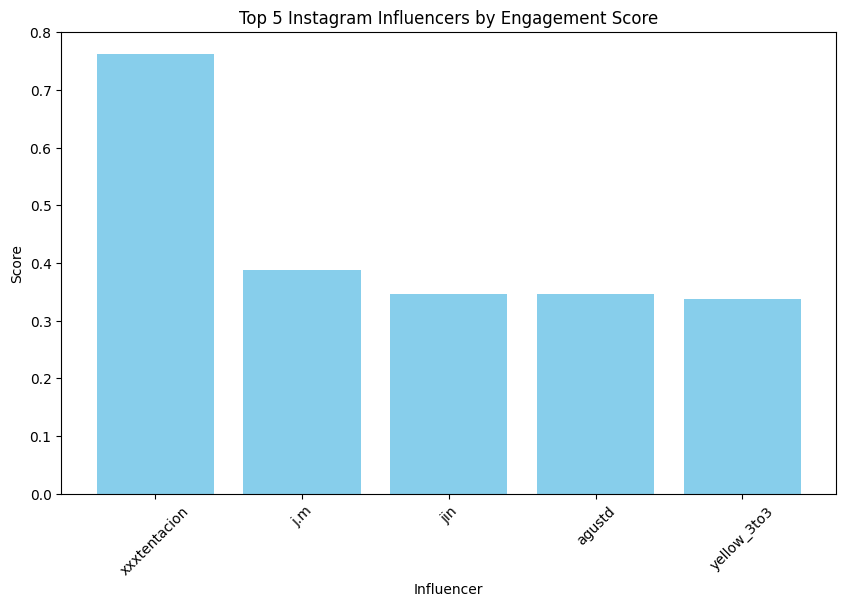

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top5['Influencer_insta_name'], top5['Influencer_Score'], color='skyblue')
plt.title("Top 5 Instagram Influencers by Engagement Score")
plt.xlabel("Influencer")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


In [5]:
import plotly.express as px

# Prepare data for top 5 influencers
top5 = df.sort_values(by='Influencer_Score', ascending=False).head(5)

# Interactive bar chart
fig = px.bar(
    top5,
    x='Influencer_insta_name',
    y='Influencer_Score',
    text='Followers',  # Show followers on bars
    hover_data={
        'Followers': True,
        'Authentic_engagement': True,
        'Engagement_avg': True,
        'Influencer_Score': ':.4f'
    },
    color='Influencer_Score',
    color_continuous_scale='Blues',
    title='Top 5 Instagram Influencers by Engagement Score'
)

fig.update_traces(texttemplate='%{text:,}', textposition='outside')
fig.update_layout(xaxis_title='Influencer', yaxis_title='Score', uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
